In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def cos_sig(time,freq,amp,offset):
    freq=float(freq)
    amp=float(amp)
    offset=float(offset)
    y=amp * np.cos(2 * np.pi * freq * time) + offset
    return y
    
    
def sin_sig(time,freq,amp,offset):
    freq=float(freq)
    amp=float(amp)
    offset=float(offset)
    y=amp * np.sin(2 * np.pi * freq * time) + offset
    return y


def normalize(ys, amp=1.0):
    """Normalizes a wave array so the maximum amplitude is +amp or -amp.

    ys: wave array
    amp: max amplitude (pos or neg) in result

    returns: wave array
    """
    high, low = abs(max(ys)), abs(min(ys))
    return amp * ys / max(high, low)


def apodize(ys, framerate, denom=20, duration=0.1):
    """Tapers the amplitude at the beginning and end of the signal.

    Tapers either the given duration of time or the given
    fraction of the total duration, whichever is less.

    ys: wave array
    framerate: int frames per second
    denom: float fraction of the segment to taper
    duration: float duration of the taper in seconds

    returns: wave array
    """
    # a fixed fraction of the segment
    n = len(ys)
    k1 = n // denom

    # a fixed duration of time
    k2 = int(duration * framerate)

    k = min(k1, k2)

    w1 = np.linspace(0, 1, k)
    w2 = np.ones(n - 2 * k)
    w3 = np.linspace(1, 0, k)

    window = np.concatenate((w1, w2, w3))
    return ys * window

def make_spectrum(ys, framerate, full=True):
    """Computes the spectrum using FFT.

    full: boolean, whethere to compute a full FFT
          (as opposed to a real FFT)

    returns: Spectrum
    """
    n = len(ys)
    d = 1 / framerate

    if full:
        hs = np.fft.fft(ys)
        fs = np.fft.fftfreq(n, d)
    else:
        fft_z = np.fft.rfft(ys)
        hs = np.abs(fft_z)
        fs = np.fft.rfftfreq(n, d)

    return fs,hs

def low_pass(hs,fs, cutoff, factor=0):
    """Attenuate frequencies above the cutoff.

    cutoff: frequency in Hz
    factor: what to multiply the magnitude by
    """
    
    hs[abs(fs) > cutoff] *= factor
    return hs
    
def high_pass(hs,fs, cutoff, factor=0):
    """Attenuate frequencies below the cutoff.

    cutoff: frequency in Hz
    factor: what to multiply the magnitude by
    """
    hs[abs(fs) < cutoff] *= factor
    return hs

def make_wave(hs,full=True):
    """Transforms to the time domain.

    returns: Wave
    """
    if full:
        ys = np.fft.ifft(hs)
    else:
        ys = np.fft.irfft(hs)

    # NOTE: whatever the start time was, we lose it when
    # we transform back; we could fix that by saving start
    # time in the Spectrum
    # ts = self.start + np.arange(len(ys)) / self.framerate
    return ys


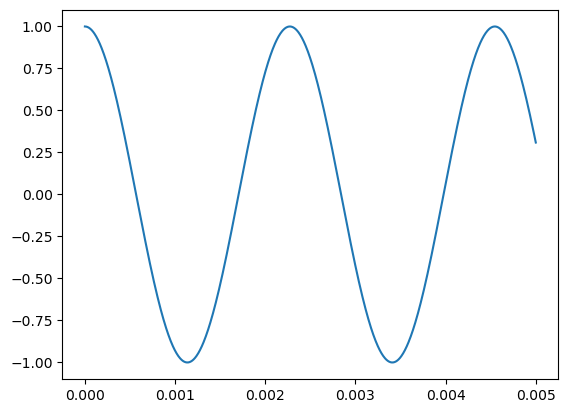

In [3]:
t = np.linspace(0,0.005,1000)

coswave=cos_sig(t,440,1.0,0)

plt.plot(t,coswave)

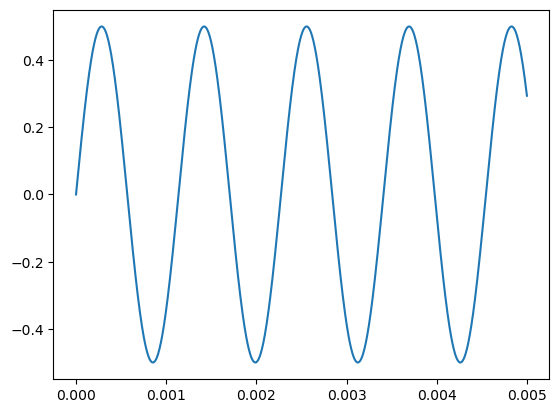

In [4]:
t = np.linspace(0,0.005,1000)

sinewave=sin_sig(t,880,0.5,0)

plt.plot(t,sinewave)

[0.         0.01383508 0.02765956 0.04146286 0.05523442 0.06896367
 0.08264011 0.09625327 0.10979272 0.12324809]
[1.         0.99990427 0.99961711 0.99913856 0.99846872 0.99760773
 0.99655573 0.99531294 0.99387959 0.99225596]
[1.         1.01373935 1.02727667 1.04060143 1.05370314 1.0665714
 1.07919584 1.09156621 1.10367231 1.11550404]


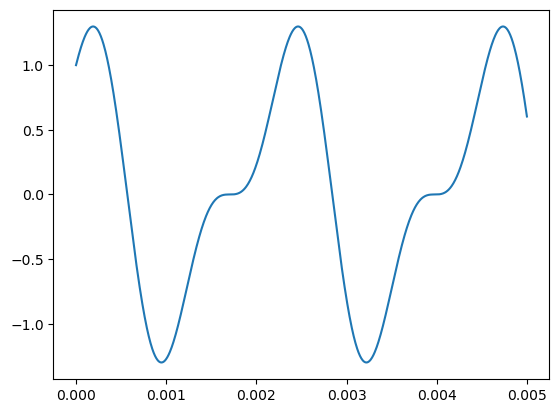

In [5]:
mix = sinewave+coswave

print(sinewave[:10])
print(coswave[:10])
print(mix[:10])


plt.plot(t,mix)

## Waves

A wave for my functions is already calculated. 

The Start time can be decided and 
duration is nothing but relation between number of samples and start time.
t = np.linspace(0,0.005,1000)

So here start time = 0
duration = 0.005
Nsamp = 1000

Framerate is nothing but a number of samples of audio carried per second, measured in Hertz (Hz).

In [6]:
from IPython.display import Audio
audio = Audio(mix,rate=11025)
audio

So, the reason is the number of samples and the duration is very small.

Lets increase it

t = np.linspace(0,0.5,10000)

coswave=cos_sig(t,440,1.0,0)
sinewave=sin_sig(t,880,0.5,0)
mix = sinewave+coswave

In [7]:
audio = Audio(mix,rate=11025)
audio

Lets experiment with the audio functions and generate various tones

In [8]:
t = np.linspace(0,0.5,10000)
sinewave=sin_sig(t,880,0.5,0)

audio = Audio(sinewave,rate=11025)
audio

In [9]:
t = np.linspace(0,0.5,10000)
sinewave=sin_sig(t,3800,0.5,0)

audio = Audio(sinewave,rate=11025)
audio

The pitch has gotton sharp

Lets restart on our mix signal

In [10]:
t = np.linspace(0,0.5,10000)

coswave=cos_sig(t,440,1.0,0)
sinewave=sin_sig(t,880,0.5,0)
mix = sinewave+coswave

In [11]:
print('Number of samples',len(mix))


#To find timestep 
print('Timestep in ms',1/1000*(t[1]-t[0]))

Number of samples 10000
Timestep in ms 5.0005000500050007e-08


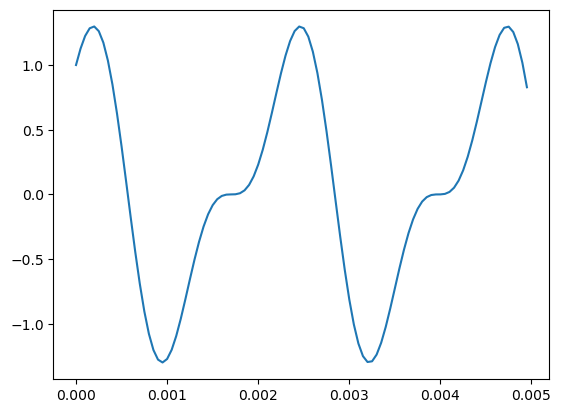

In [12]:
segment=mix[:100]     #first 100 samples plot
segment_t=t[:100]

plt.plot(segment_t,segment)

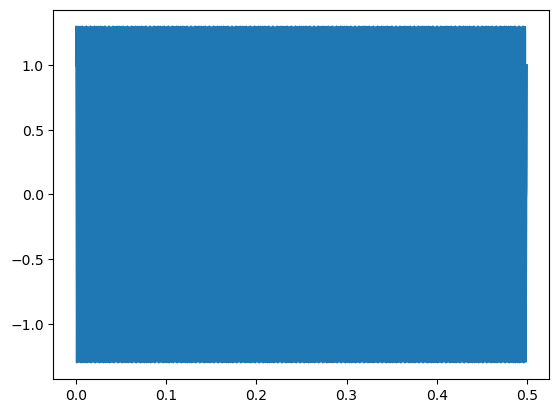

In [13]:
plt.plot(t,mix)

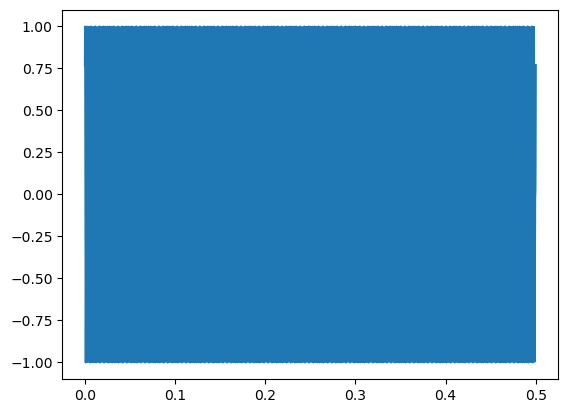

In [14]:
norm_wave=normalize(mix)
plt.plot(t,norm_wave)

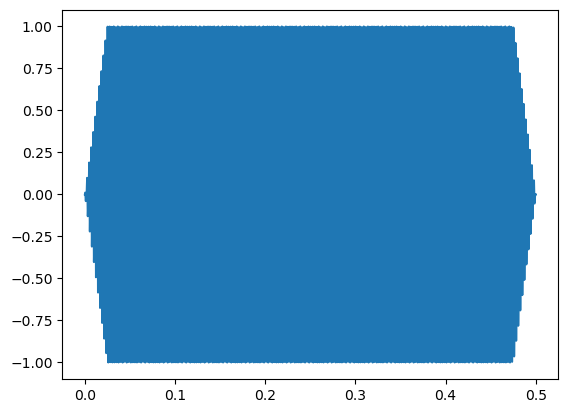

In [15]:
apodize_wave=apodize(norm_wave,11025)
plt.plot(t,apodize_wave)

In [16]:
from scipy.io.wavfile import write

# Save as WAV file
write('temp.wav', 11025, np.int16(apodize_wave * 32767))


In [17]:
from scipy.io import wavfile
sample_rate, data = wavfile.read('92002__jcveliz__violin-origional.wav')

if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

audio = Audio(data,rate=sample_rate)
audio

In [18]:
print("Sample Rate = ",sample_rate)
print(len(data))
print("Total time = Sample Rate/No. of Samples = ",len(data)/sample_rate)

Sample Rate =  44100
220500
Total time = Sample Rate/No. of Samples =  5.0


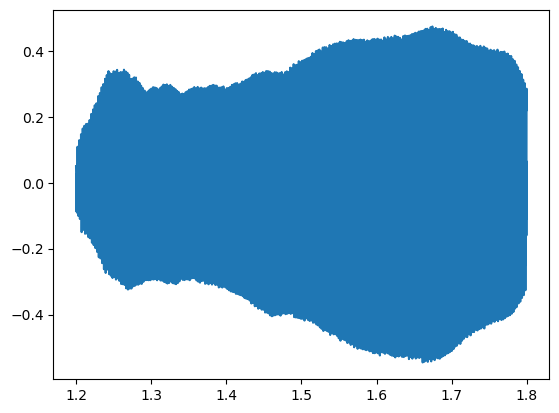

In [19]:
start = 1.2
duration = 0.6
segment=[]
segment_t=[]


data_t=normalize(data)
data=apodize(data_t,44100)

segment_t = np.linspace(1.2,float(start+duration),int(sample_rate*duration))

segment = data[int(sample_rate*1.2):int(sample_rate*1.8)]
plt.plot(segment_t,segment)

## Spectrum

In [20]:
f,y = make_spectrum(segment,44100)

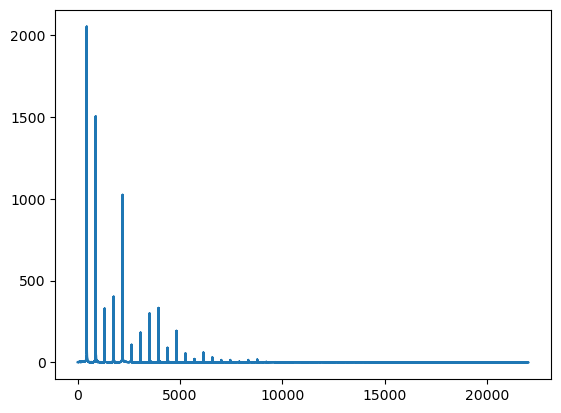

In [21]:
plt.plot(abs(f),abs(y))

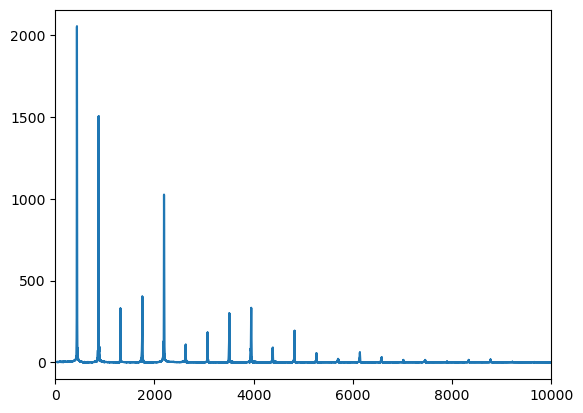

In [22]:
plt.xlim(0,10000)
plt.plot(abs(f),abs(y))

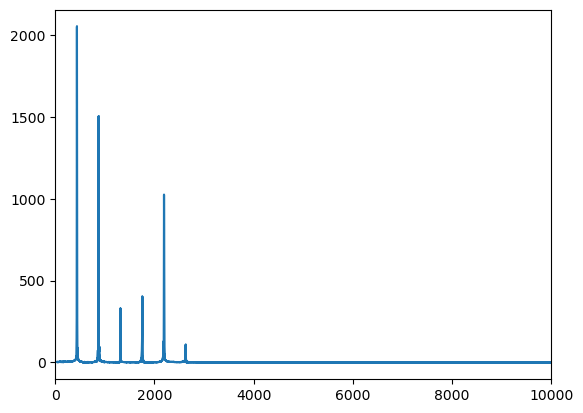

In [23]:
y_new = low_pass(y,f,3000)
plt.xlim(0,10000)
plt.plot(abs(f),abs(y_new))

In [24]:
#print(len(y_new))

26460


In [25]:
filtered = make_wave(y_new)

In [26]:
t = np.linspace(0,0.6,len(filtered))

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


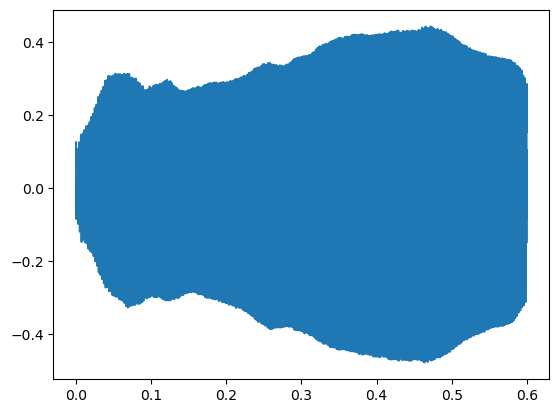

In [27]:
plt.plot(abs(t),filtered)

In [28]:
y_norm= normalize(filtered)
y_apodize= apodize(y_norm,44100)

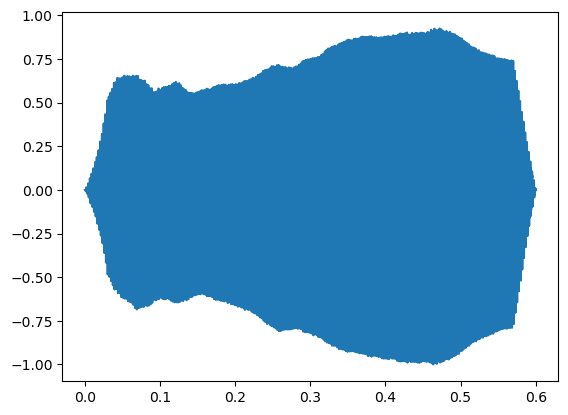

In [29]:
plt.plot(abs(t),y_apodize)

In [30]:
audio = Audio(y_apodize,rate=44100)
audio

C:\ProgramData\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [31]:
audio = Audio(segment,rate=44100)
audio

## Lets do it on the full audio

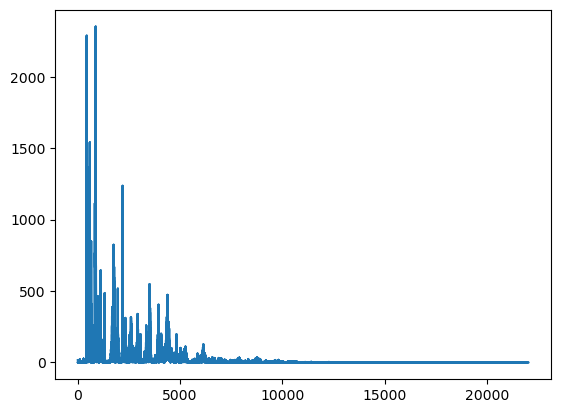

In [32]:
full_f,full_Amp = make_spectrum(data,44100)
plt.plot(abs(full_f),abs(full_Amp))

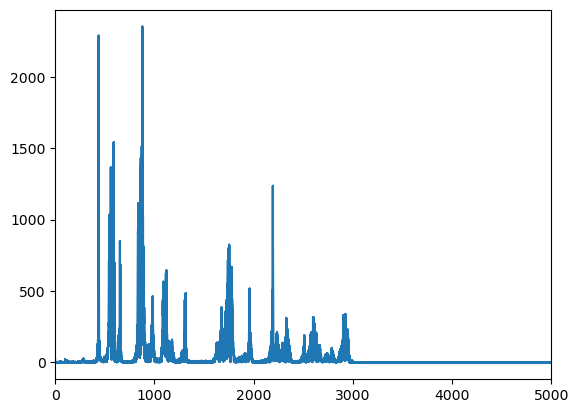

In [33]:
full_lp_Amp = low_pass(full_Amp,full_f,3000)
plt.xlim(0,5000)
plt.plot(abs(full_f),abs(full_lp_Amp))


In [34]:
filtered_f = make_wave(full_lp_Amp)
y_norm= normalize(filtered_f)
y_apodize= apodize(y_norm,44100)

audio = Audio(y_apodize,rate=44100)
audio

## Original was

In [35]:
sample_rate, data = wavfile.read('92002__jcveliz__violin-origional.wav')

audio = Audio(data,rate=sample_rate)
audio

In [36]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    full_f,full_Amp = make_spectrum(data,44100)
    plt.plot(abs(full_f),abs(full_Amp),color='0.7')
    sample_rate=44100
    total = start+duration
    
    segment_t = np.linspace(start,float(total),int(sample_rate*duration))
    segment = data[int(sample_rate*start):int(sample_rate*total)]
    f,y = make_spectrum(segment,44100)
    y_new = low_pass(y,f,cutoff)
    plt.plot(abs(f),abs(y_new),color='#045a8d')
    filtered = make_wave(y_new)
    y_norm= normalize(filtered)
    y_apodize= apodize(y_norm,44100)
    plt.show()
    
    audio = Audio(y_apodize,rate=44100)
    display(audio)

    

In [37]:
from ipywidgets import interact, fixed
interact(filter_wave, 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

In [38]:
print()